# Ejercicio 1.1
1- Correr lo visto en el curso de la sección "Lab" del libro de James-Witten-Hastie-Tibshirani para el capítulo de clasificación.
En particular interesa saber realizar las predicciones, armar la matriz de confusión y separar los datos en determinado porcentaje para entrenamiento y el resto para predicción.

**Se correra el lab correspondiente a la seccion 4.7: Lab: Logistic Regression, LDA, QDA, and KNN**

In [ ]:
#instalo libreria con los datos de Smarket segun libro
!pip install ISLP


In [ ]:
#cargo librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import subplots

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
# Cargar el conjunto de datos Smarket
Smarket = load_data('Smarket')
Smarket
# Resumen del conjunto de datos
print(Smarket.info())

# Estadísticas descriptivas
print(Smarket.describe())

#columnas
Smarket.columns

#matriz de correlacion de las variables en el DF
# Seleccionar solo las columnas numéricas
numerical_columns = Smarket.select_dtypes(include=['float64', 'int64'])

numerical_columns.corr()


#Plotteamos los datos que tenemos para observar la correlacion entre volumen y anio
#Smarket.plot(y='Volume')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB
None
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25% 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Lag1'].plot(kind='hist', bins=20, title='Lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lag2'].plot(kind='hist', bins=20, title='Lag2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Lag3'].plot(kind='hist', bins=20, title='Lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Lag1', y='Lag2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Lag2', y='Lag3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Lag3', y='Lag4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lag1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lag1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lag2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lag2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lag3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lag3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lag4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lag4')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Lag1'].plot(kind='line', figsize=(8, 4), title='Lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Lag2'].plot(kind='line', figsize=(8, 4), title='Lag2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Lag3'].plot(kind='line', figsize=(8, 4), title='Lag3')
plt.gca().spines[['top', 'right']].set_visible(False)

## REGRESION LOGISTICA
Vamos a predecir 'Direccion' en base a Lag 1,Lag 2,Lag 3,Lag 4,Lag 5 y Volume.

In [ ]:
#para hacer regresion logistica se pueden usar 2 funciones: sm.GLM() o sm.Logit().
#Con sm.Logit()se hace directamente la regresion logistica.
#Con sm.GLM() puedo elegir entre modelos lineares generalizados (entre ellos la regresion logistica para lo cual uso este argumento: family=sm.families.Binomial())

allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y,
            X,
            family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


el p valor mas chico es el de Lag1, y su coeficiente es negativo. Esto indicaria que si el mercado tuvo un return positivo ayer entonces es poco probable que hoy vuelva a subir. Igualmente el p-valor para Lag1 sigue siendo grande por lo que  no se evidencia una asociacion clara entre Lag1 y Direction.

In [ ]:
#quiero ver solamente los coeficientes para el modelo
results.params


,0
intercept,-0.126000
Lag1,-0.073074
Lag2,-0.042301
Lag3,0.011085
Lag4,0.009359
Lag5,0.010313
Volume,0.135441


In [ ]:
#a traves de predict() podemos ver la probabilidad de que el mercado suba dado los valores que ya tenemos de los predictores
probs = results.predict()
probs[:10]

#en vez de verlo en probablidad a mi me va a interesar verlo con las etiquetas de clase (up, down). Creo un Vector con las predicciones de clase basado en que el aumento sea +- 0.5
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"

#Observo esto en la matriz de confusion
confusion_table(labels, Smarket.Direction)

#our model correctly predicted that the market would go up on 507 days and that
#it would go down on 145 days, for a total of 507 + 145 = 652 correct
#predictions.

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


Aunque parezca que nuestro modelo esta funcionando bastante bien (52.2% de las veces le emboca), hay que recordar que no separamos entre train y test. Entrenamos al modelo con TODAS nuestras observaciones: tenemos un 47.8 de training error rate. Vamos a tener que separar en train y test para asesorar mejor su performance.

In [ ]:
# Define the training and testing sets
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]  # Use ~ to negate the boolean mask

# Check the shape of the test set
print(Smarket_test.shape)

(252, 9)


Corremos regresion logistica entrenando con fechas previas a 2005 y obtenemos las predicciones para los dias de 2005. Entrenamos y testeamos en dos datasets completamente distintos.

In [ ]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                  X_train,
                  family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [ ]:
#comparamos a los predictores con lo que realmente paso en 2005
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

#tomamos como threshold un +- 0.5 (50%) para etiquetar nuestras probabilidades
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [ ]:
np.mean(labels == L_test), np.mean(labels != L_test)
#ahora, el accuracy en test dio 48% y el error en test 52% --> tenemos peores resultados!!

(0.4801587301587302, 0.5198412698412699)

In [ ]:
#a ver que pasa si le saco todas las variables menos las mas correlacionadas segun lo que vimos al principio
 model = MS(['Lag1', 'Lag2']).fit(Smarket)
 X = model.transform(Smarket)
 X_train, X_test = X.loc[train], X.loc[~train]
 glm_train = sm.GLM(y_train,
                  X_train,
                  family=sm.families.Binomial())
 results = glm_train.fit()
 probs = results.predict(exog=X_test)
 labels = np.array(['Down']*252)
 labels[probs>0.5] = 'Up'
 confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


El modelo da un poco mejor ahora: 56% de predicciones correctas. 58% de accuracy para UP --> le emboca mas. Que pasa si quiero predecir la direccion en base a valores que supongo de Lag1 y Lag2?

In [ ]:
 newdata = pd.DataFrame({'Lag1':[1.2, 1.5],
                        'Lag2':[1.1,-0.8]});
newX = model.transform(newdata)
results.predict(newX)

,0
0,0.479146
1,0.496094


## LINEAR DISCRIMINANT ANALYSIS (LDA)

In [ ]:
#APLICO LDA en Smarket data usando observaciones de antes del 2005
lda = LDA(store_covariance=True)

LDA genera una columna extra indent que tengo que droppear para que no haya redundancia en el modelo!!!! Hay que dropearla tanto en test como en train.

In [ ]:
X_train, X_test = [M.drop(columns=['intercept'])
for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [ ]:
#Means de LDA son el promedio de cada predictor dentro de cada clase (lag1,lag2 dentro de up o down)
#Esto se lee: hay una tendencia que en los dos dias previos los resultados sean negativos cuando el market esta UP
#y hay una tendencia de que en los dias previos los resultados sean positivos cuando el market esta DOWN
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
 lda.classes_
 #veo las etiquetas para confirmar que lo que estoy interpretando arriba sea correcto

array(['Down', 'Up'], dtype='<U4')

In [ ]:
lda.priors_

array([0.49198397, 0.50801603])

In [ ]:
 #uso scalings para ver los vectores de LDA. Estos valores me dan la combinacion linear de Lag1 y Lag2 que se usan para la toma de decision en LDA (SON LOS MULTIPLICADORES X=x)
 lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [ ]:
#veo la tabla de confusion
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [ ]:
#estimo la probabilidad de cada clase para cada data point en el training set. Aplico un threshold de 50%
lda_prob = lda.predict_proba(X_test)
np.all(
np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
 )

#en el caso de que yo tenga un problema con mas de dos clases puedo usar el siguiente codigo y la clase se elije con la probabilidad mas alta de clase
#np.all(
#[lda.classes_[i] for i in np.argmax(lda_prob, 1)] ==
#lda_pred
#)

True

## QUADRATIC DISCRIMINANT ANALYSIS (QDA)

In [ ]:
#Aplico QDA a Smarket data
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [ ]:
#este modelo me va a estimar una covarianza por clase.
#Los resultados incluyen el grouped means pero no van a incluir los coeficientes de los discriminantes lineares (como en LDA) porque QDA implica una funcion cuadratica de los predictores
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [ ]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


En base a la matriz de confusion , QDA tiene un 60% de accuracy a pesar de ni haber usado datos del 2005 en su entrenamiento. Pareciera estar muy bien este resultado y eso indicaria una forma cuadratica se ajusta a la relacion entre los datos mas que una forma lineal. Igualmente hay que testear en test datasts mas grandes la performance de este modelo.

In [ ]:
 np.mean(qda_pred == L_test)

0.5992063492063492

## NAIVE BAYES

In [ ]:
#Aplicamos Naive Bayes a Smarket data
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [ ]:
#las clases se en naive se guardan en classes_
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [ ]:
#las probabilidades por clase se guardan en class_prior_
 NB.class_prior_

array([0.49198397, 0.50801603])

In [ ]:
#los parametros de cada feature se encuentran en theta_
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
#la varianza
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [ ]:
X_train[L_train == 'Down'].mean()

,0
Lag1,0.042790
Lag2,0.033894


In [ ]:
 X_train[L_train == 'Down'].var(ddof=0)

,0
Lag1,1.503554
Lag2,1.532467


In [ ]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)
#tenemos un 59% de accuracy - a naive bayes le va mejor que a LDA pero peor que a QDA

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [ ]:
#puedo usar predict_proba() para obtener las predicciones de cada observacion en cada clase
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

## K-NEAREST NEIGHBOURS (KNN)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1) #usamos K=1
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)
#los resultados usando k=1 no son muy buenos (50% accuracy)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [ ]:
#repetimos usando k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

#en el caso de los datos de SMarket el mejor modelo es QDA. KNN mejora un poco con k=3 pero aumentar mas k no da mejores resultados.

0.5317460317460317

Se aplica un ejemplo adicional de KNN con datos Caravan (demograficos de comportamiento de compra)

In [ ]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

,count
Purchase,
No,5474
Yes,348


In [ ]:
#usaremos como variables predictoras todas las columnas menos purchase
feature_df = Caravan.drop(columns=['Purchase'])

*EN KNN NECESITO ESTANDARIZAR LOS DATOS!!! ES UN METODO QUE PREDICE EN BASE A LA CERCANIA, PERO NO LE IMPORTA SI TENES VARIABLES EN DISTINTAS ESCALAS. HAY QUE ESTANDARIZAR PARA QUE LAS VARIABLES ESTEN EN UNA ESCALA COMPARABLE.*

In [ ]:
scaler = StandardScaler(with_mean=True,
with_std=True,
copy=True)

In [ ]:
#APLICO EL SCALER A MIS VARIABLES, DEJANDOLAS CON MEAN=0 Y STANDARD DEVIATION= 1
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

#CHEQUEALO ACA:
feature_std = pd.DataFrame(
X_std,
columns=feature_df.columns);
feature_std.std()

,0
MOSTYPE,1.000086
MAANTHUI,1.000086
MGEMOMV,1.000086
MGEMLEEF,1.000086
MOSHOOFD,1.000086
...,...
AZEILPL,1.000086
APLEZIER,1.000086
AFIETS,1.000086
AINBOED,1.000086


In [ ]:
#separo en train y test
(X_train,
X_test,
y_train,
y_test) = train_test_split(feature_std,
Purchase,
test_size=1000,
random_state=0)

In [ ]:
#aplico KNN
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

#tenemos casi 11% de error rate en 1000 obs. A nosotros nos va a interesar las que las predicciones de los que quieren comprar el seguro sean correctas al final del dia . $$

(0.111, 0.067)

In [ ]:
 confusion_table(knn1_pred, y_test)
 #al final, KNN con K=1 ajusta bastante bien. de 62 clientes que predijo como que compraban el seguro, 9 efectivamente lo compraron: casi 15% del total.

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


TUNING PARAMETERS IN KNN - como elegir K // HIPERPARAMETROS.

Interesa saber como KNN ajusta en test data con distintos valores de parametros para enternder cual es el mejor valor de vecinos que podemos asignarle al modelo.

In [ ]:
for K in range (1,6):
  knn = KNeighborsClassifier(n_neighbors=K)
  knn_pred = knn.fit(X_train, y_train).predict(X_test)
  C = confusion_table(knn_pred, y_test)
  templ = ('K={0:d}: # predicted to rent: {1:>2},' +
    ' # who did rent {2:d}, accuracy {3:.1%}')
  pred = C.loc['Yes'].sum()
  did_rent = C.loc['Yes','Yes']
  print(templ.format(
    K,
    pred,
    did_rent,
    did_rent / pred))

  #en los resultados se ve clarito que los numeros para k=4 por ejemplo, son muy distintos que tomando otros k..

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


In [ ]:
#a modo de comparacion podemos ajustar un modelo de regresion linear a estos datos tambien
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,933,67
Yes,0,0


In [ ]:
#NO usamos como threshold 0.5 porque sino nos va a dar que ninguna de las observaciones el test compra el seguro. Entonces usamos 0.25:  Cada vez que se predice mas de 0.25 entonces se compra.
#los resultados dan bastante bien: predecimos que 29 personas compran el seguro y le embocamos al 31% de esa gente.
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


# **EJERCICIO 1.3 3- Dibujar las curvas ROC en cada caso y calcular la medida AUC para comparar los métodos de predicción.**

## Ejercicio 1. - SOLUCION ALTERNATIVA AL LIBRO CON ROC Y AUC
1- Correr lo visto en el curso de la sección "Lab" del libro de James-Witten-Hastie-Tibshirani para el capítulo de clasificación.
En particular interesa saber realizar las predicciones, armar la matriz de confusión y separar los datos en determinado porcentaje para entrenamiento y el resto para predicción.
3- Dibujar las curvas ROC en cada caso y calcular la medida AUC para comparar los métodos de predicción.

**Se correra el lab correspondiente a la seccion 4.7: Lab: Logistic Regression, LDA, QDA, and KNN. Con codigo mio, sigue el libro pero no es exactamente igual. es mas ''vida real''**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#instalo libreria para los datos
!pip install ISLP


In [ ]:
from ISLP import load_data

# Cargar el conjunto de datos Smarket
smarket_data = load_data('Smarket')
smarket_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
# Resumen del conjunto de datos
print(smarket_data.info())

# Estadísticas descriptivas
print(smarket_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB
None
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25% 

**PREPROCESAMIENTO DE LOS DATOS: defino las variables predictoras y la respuesta, divido train y test**

In [ ]:
# Define predictors and response
predictors = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]
X = smarket_data[predictors]
y = (smarket_data["Direction"] == "Up").astype(int)  # Convert to binary: Up = 1, Down = 0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **REGRESION LOGISTICA**

In [ ]:
# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Confusion Matrix (Logistic Regression):
[[ 55 125]
 [ 58 137]]
Accuracy: 0.512


La regresion logistica predice la probabilidad del valor "up" y evalua su performance en test.

In [ ]:
# Tasa de error para hacer el plot comparativo
error_log = 1 - accuracy_score(y_test, y_pred_log)
print("Test Error Rate (Logistic Regression):", error_log)

Test Error Rate (Logistic Regression): 0.488


In [ ]:
#ROC Y AUC
# Calcular las probabilidades para la clase positiva
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Segunda columna: prob. clase positiva

# Calcular la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)

# Calcular el AUC
auc_log = roc_auc_score(y_test, y_pred_prob_log)
print(f"AUC (Logistic Regression): {auc_log}")


AUC (Logistic Regression): 0.48028490028490034


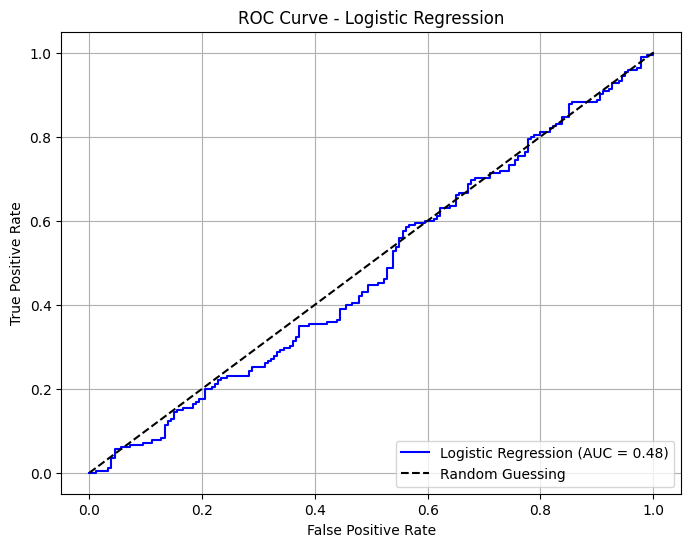

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Línea diagonal (azar)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [ ]:
# Fit LDA
lda = LDA()
lda.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lda = lda.predict(X_test)
print("Confusion Matrix (LDA):")
print(confusion_matrix(y_test, y_pred_lda))
print("Accuracy:", accuracy_score(y_test, y_pred_lda))


Confusion Matrix (LDA):
[[ 39 152]
 [ 34 150]]
Accuracy: 0.504


LDA assume distribucion Gaussian para los predictores dentro de cada clase y usa los predictores para crear un limite("linea") de decision linear.

In [ ]:
# Tasa de error
error_lda = 1 - accuracy_score(y_test, y_pred_lda)
print("Test Error Rate (LDA):", error_lda)

Test Error Rate (LDA): 0.496


In [ ]:
#ROC Y AUC
# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_lda = lda.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_prob_lda)
# Calcular el AUC
auc_lda = roc_auc_score(y_test, y_pred_prob_lda)
print(f"AUC (LDA): {auc_lda:.2f}")


AUC (LDA): 0.51


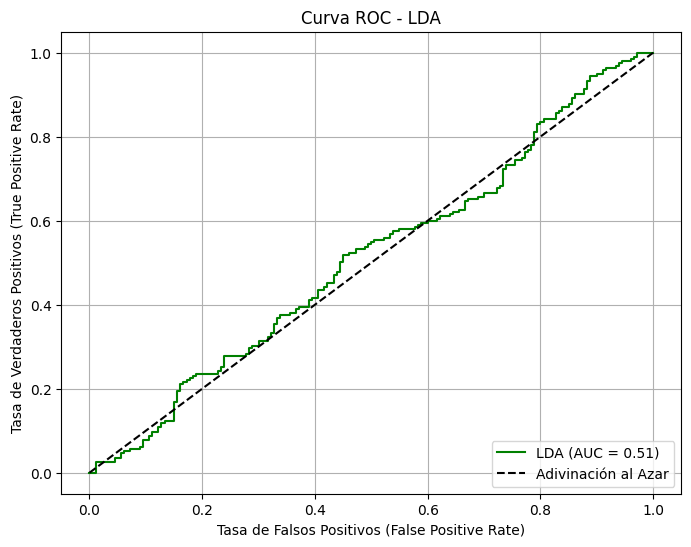

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - LDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **Quadratic Discriminant Analysis (QDA)**

In [ ]:
# Fit QDA
qda = QDA()
qda.fit(X_train, y_train)

# Predictions and evaluation
y_pred_qda = qda.predict(X_test)
print("Confusion Matrix (QDA):")
print(confusion_matrix(y_test, y_pred_qda))
print("Accuracy:", accuracy_score(y_test, y_pred_qda))


Confusion Matrix (QDA):
[[ 51 140]
 [ 55 129]]
Accuracy: 0.48


 QDA es similar a LDA pero permite separar las matrices de covarianza para cada clase, permitiendo limites de decision no lineares(convexos).

In [ ]:
# Tasa de error
error_qda = 1 - accuracy_score(y_test, y_pred_qda)
print("Test Error Rate (QDA):", error_qda)

Test Error Rate (QDA): 0.52


In [ ]:
#ROC Y AUC
# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_qda = qda.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_pred_prob_qda)

# Calcular el AUC
auc_qda = roc_auc_score(y_test, y_pred_prob_qda)
print(f"AUC (QDA): {auc_qda:.2f}")



AUC (QDA): 0.51


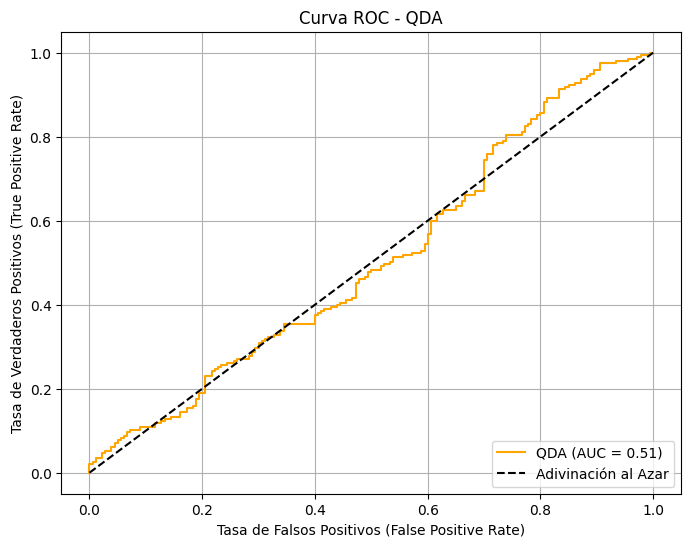

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - QDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **K-Nearest Neighbors (KNN)**

 KNN predice la clase en base a un voto mayoritario dentro de los vecinos mas cercanos, es un metodo no parametrico.

Notas adicionales sobre KNN: KNN es sensible a la escala de sus predictores. Se puede estandarizar train y test utilizando StandardScaler.

Hyperparameter Tuning: para KNN se puede ir probando distintos valores de K hasta hallar el optimo.

In [ ]:
# Standardize features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}  # Test values of k from 1 to 20

# Initialize the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best k
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")


The best value of k is: 17


In [ ]:
# Fit KNN using the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Confusion Matrix (KNN):
[[ 69 111]
 [ 87 108]]
Accuracy: 0.472


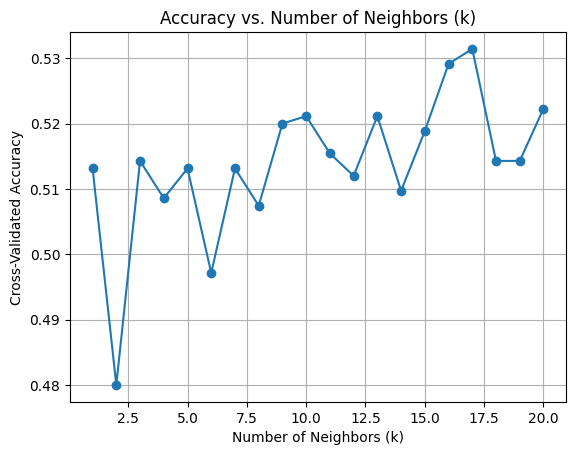

In [ ]:
# Extract accuracy for each value of k
k_values = param_grid['n_neighbors']
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid()
plt.show()


In [ ]:
# Tasa de error
error_knn = 1 - accuracy_score(y_test, y_pred_knn)
print("Test Error Rate (KNN):", error_knn)

Test Error Rate (KNN): 0.528


In [ ]:
#ROC y AUC

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el AUC
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"AUC (KNN): {auc_knn:.2f}")


AUC (KNN): 0.48


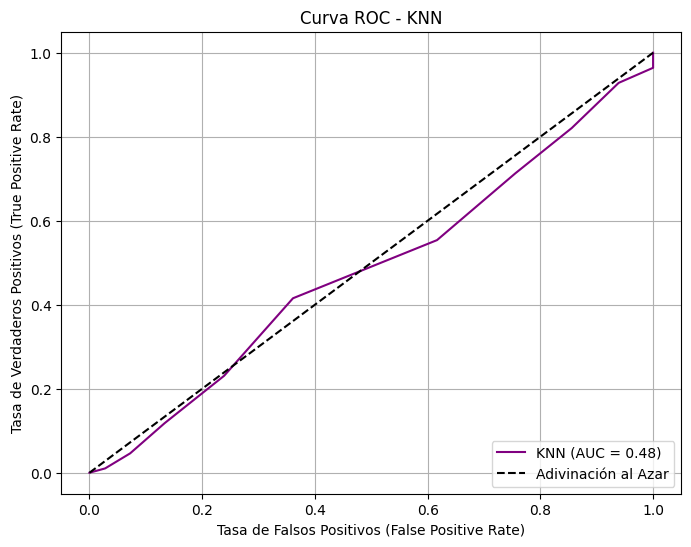

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **NAIVE BAYES**
El clasificador Naive Bayes asume que las features son independientes dada su clase. Calcula la probabilidad de cada clase y asigna la observacion a la clase con la probabilidad mas alta. Se usa GaussianNB paquete

In [ ]:
# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Confusion Matrix (Naive Bayes):
[[ 73 107]
 [ 75 120]]
Accuracy: 0.5146666666666667


In [ ]:
# Tasa de error
error_nb = 1 - accuracy_score(y_test, y_pred_nb)
print("Test Error Rate (Naive Bayes):", error_nb)

Test Error Rate (Naive Bayes): 0.528


In [ ]:
#ROC Y AUC

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

# Calcular el AUC
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print(f"AUC (Naive Bayes): {auc_nb:.2f}")



AUC (Naive Bayes): 0.49


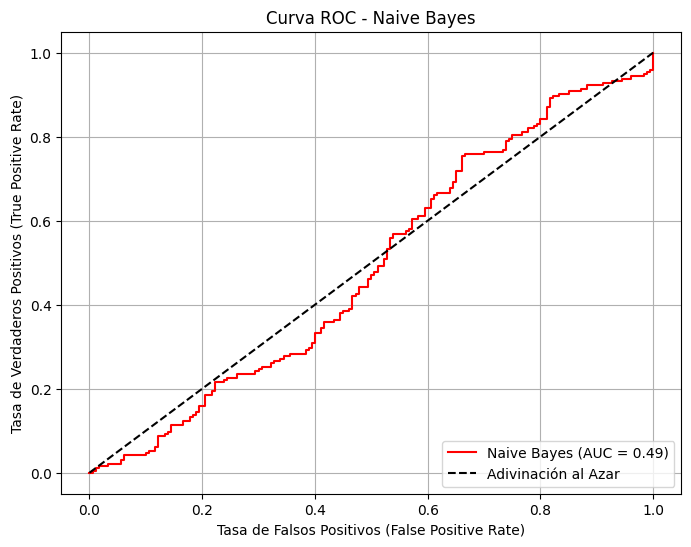

In [ ]:
import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Categorical Features in Naive Bayes:
For datasets with categorical features, you would use CategoricalNB instead of GaussianNB.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
# Simulated categorical dataset
data = {
    'Feature1': np.random.choice(['A', 'B', 'C'], size=200),
    'Feature2': np.random.choice(['X', 'Y'], size=200),
    'Feature3': np.random.choice(['Low', 'Medium', 'High'], size=200),
    'Target': np.random.choice(['Yes', 'No'], size=200)
}

df = pd.DataFrame(data)
print(df.head())


  Feature1 Feature2 Feature3 Target
0        B        Y     High    Yes
1        A        Y   Medium    Yes
2        B        X   Medium    Yes
3        B        Y     High    Yes
4        A        X     High    Yes


In [ ]:
# Encode categorical features
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = df[col].astype('category').cat.codes

print(df_encoded.head())


   Feature1  Feature2  Feature3  Target
0         1         1         0       1
1         0         1         2       1
2         1         0         2       1
3         1         1         0       1
4         0         0         0       1


In [ ]:
# Define features and target
X_categorical_NB = df_encoded[['Feature1', 'Feature2', 'Feature3']]
y_categorical_NB = df_encoded['Target']

# Split the dataset
X_train_categorical_NB, X_test_categorical_NB, y_train_categorical_NB, y_test_categorical_NB = train_test_split(X_categorical_NB, y_categorical_NB, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Categorical Naive Bayes model
nb = CategoricalNB()

# Fit the model
nb.fit(X_train_categorical_NB, y_train_categorical_NB)

# Make predictions
y_pred_categorical_NB = nb.predict(X_test_categorical_NB)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_categorical_NB, y_pred_categorical_NB))
print("Accuracy:", accuracy_score(y_test_categorical_NB, y_pred_categorical_NB))


Confusion Matrix:
[[11 22]
 [ 6 21]]
Accuracy: 0.5333333333333333


## **PLOT DE LAS TASAS DE ERRORES EN LOS DISTINTOS METODOS**

In [ ]:
# Diccionario con los resultados
error_rates = {
    "Naive Bayes": 0.528,
    "KNN": 0.472,
    "QDA": 0.52,
    "LDA": 0.496,
    "Logistic Regression": 0.4933333333333333
}


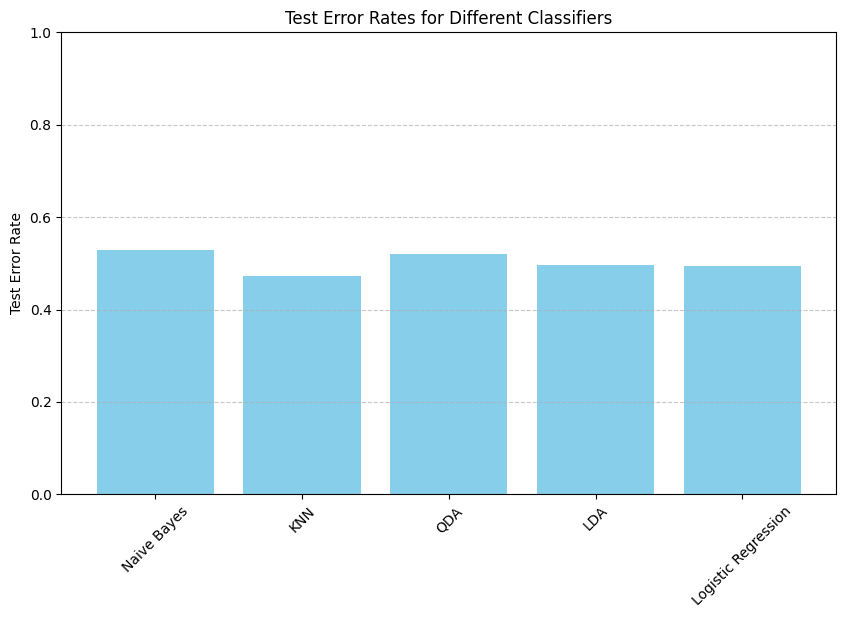

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(error_rates.keys(), error_rates.values(), color='skyblue')
plt.ylabel("Test Error Rate")
plt.title("Test Error Rates for Different Classifiers")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # El rango de las tasas de error (0 a 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## GRAFICO COMBINADO DE CURVAS ROC

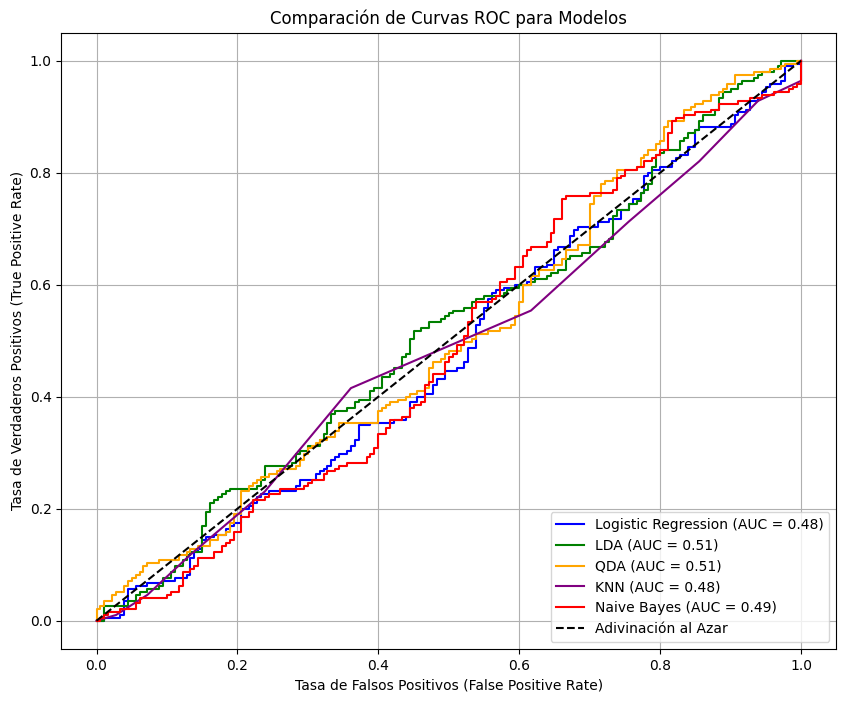

In [ ]:
# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))

# Agregar cada curva ROC
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.2f})", color='green')
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.2f})", color='orange')
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color='purple')
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='red')

# Línea diagonal (azar)
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")

# Personalizar el gráfico
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Comparación de Curvas ROC para Modelos")
plt.legend(loc="lower right")
plt.grid()
plt.show()


La Curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que evalúa el rendimiento de un modelo de clasificación binaria en diferentes umbrales de decisión.

Ejes del gráfico:

Eje X: Tasa de falsos positivos (False Positive Rate, FPR).
𝐹
𝑃
𝑅
=
Falsos Positivos (FP)
Total de Negativos (FP + TN)
FPR=
Total de Negativos (FP + TN)
Falsos Positivos (FP)
​

Eje Y: Tasa de verdaderos positivos (True Positive Rate, TPR o Sensibilidad).
𝑇
𝑃
𝑅
=
Verdaderos Positivos (TP)
Total de Positivos (TP + FN)
TPR=
Total de Positivos (TP + FN)
Verdaderos Positivos (TP)
​

Cómo se construye:

El modelo calcula una probabilidad de pertenecer a la clase positiva para cada observación.
Se varía el umbral de decisión (ej. de 0 a 1) y se calculan los FPR y TPR correspondientes en cada punto.
Se grafica la TPR frente a la FPR.

¿Qué mide el AUC (Area Under the Curve)?
El AUC es el área bajo la curva ROC y es un resumen numérico del rendimiento global del modelo.

Interpretación:

AUC = 1: Modelo perfecto.
AUC = 0.5: Modelo no mejor que el azar.

0.5 < AUC < 1: Indica qué tan bien el modelo separa las clases:

Más cerca de 1: Mejor discriminación.

Más cerca de 0.5: Peor discriminación.

¿Para qué sirven ROC y AUC?
Evaluar el rendimiento de un modelo de clasificación:
Comparan la capacidad de un modelo para separar correctamente las clases positivas y negativas.
Ayudan a seleccionar umbrales:
La curva ROC muestra cómo varían las métricas de falsos positivos y verdaderos positivos en función del umbral de decisión.
Comparar modelos:
AUC permite comparar diferentes modelos de manera objetiva:
Modelos con mayor AUC tienen mejor capacidad de discriminación.
¿Cuándo se usan?
Clasificación binaria:
Para evaluar modelos como Regresión Logística, LDA, KNN, Naive Bayes, etc.
Clases desbalanceadas:
Son útiles porque no dependen de un único umbral o de la proporción de clases.
Ventajas de ROC y AUC
Independientes del umbral:
Evalúan el modelo en todos los umbrales posibles, proporcionando una visión completa.
Comparación fácil:
AUC permite comparar múltiples modelos con un solo número.
Limitaciones
No mide precisión:
No considera qué tan cerca están las probabilidades predichas de los valores reales.
No apto para clasificación multiclase:
ROC y AUC requieren adaptaciones para problemas con más de dos clases.

# Ejercicio 2.1
1- Realizar el ejercicio 2 del práctico 7 del curso 2021.

Sean X1 y X2 dos variables uniformes en [-4,5] e Y una variable que se quiere predecir a partir de ellas.

 a) Simular una relacion entre Y y (X1,X2) del tipo:
 n=100; a=-2; b=2; c=3
 x1=runif(n,-4,5); x2=runif(n,-4,5)
 y=exp(a*x1+b*x2+c + rnorm(n))
 y=y/(1+y) ; y=rbinom(n,1,y)

 b) Representar graficamente la nube de puntos formada por las variables explicativas, representando los puntos con colores distintos segun la modalidad de Y . Representar Y en funcion de X1 e Y en funcion de X2.

 c) Estimar el modelo de regresion logistica a traves de la funcion glm:
 glm.res=glm(y~x1+x2,family=binomial)

 Comentar el resultado obtenido con el comando summary(glm.res) Cual es el aporte de cada variable
 explicativa?

 d) Realizar las predicciones de Y para la muestra de entrenamiento con
 yhat=predict(glm.res,data.frame(x1=x1,x2=x2),type=response)
 Convertir las probabilidades a clases y dar los resultados con una matriz de confusion table(yhat,y).

 e) Simular una nueva muestra de tamano 100. Calcular la sensibilidad y la especi cidad para seq(0,1,0.01).
 Trazar la curva ROC (como funcion escalera).

 f ) Hacer lo mismo usando una sola variable explicativa en el modelo logstico. Superponer ambas curvas
 ROC y elegir el mejor modelo


In [ ]:
###


# Ejercicio 2.2
 Con los mismos datos del ejercicio aplicar knn, lda, qda, y naiveBayes.

In [ ]:
###

# Ejercicio 2.3
Con los mismos datos del ejercicio aplicar SVM, RandomForests y CART

In [ ]:
###